# A very intro to web scraping

Let´s start with a [video](https://www.youtube.com/watch?v=Ct8Gxo8StBU)

- A lot of data isn't accessible through data sets or APIs. This data may exist on the internet as web pages, however. One way to access the data without waiting for the provider to create an API is to use a technique called web scraping

- Web scraping loads a web page into Python so we can extract the information we want. We can then work with the data using standard analysis tools like `pandas` and `numpy`

- Before we can do web scraping, we need to understand the structure of the web page we're working with and then find a way to extract parts of that structure in a manner that makes sense.

- We'll use the `requests` library often as we learn about web scraping. (This library enables us to download a web page.) We'll also use the `beautifulsoup` library to extract the relevant parts of the web page.

## Pandas and HTML tables

The pandas `read_html()` function is a quick and convenient way to turn an HTML table into a pandas DataFrame. This function can be useful for quickly incorporating tables from various websites without figuring out how to scrape the site’s HTML. However, there can be some challenges in cleaning and formatting the data before analyzing it.

<img src="https://pbpython.com/images/html-to-pandas-header.png" width="400">

You cand find a tutorial [here](https://pbpython.com/pandas-html-table.html)

In [15]:
import pandas as pd 
URL_MEF = "https://es.wikipedia.org/wiki/Anexo:Ministros_de_Econom%C3%ADa_del_Per%C3%BA"
MEF = pd.read_html(URL_MEF) 

In [ ]:
MEF[1]

In [ ]:
MEF[1] # Starting in 1969

In [19]:
df = MEF[1] 
df

Titular                                            \
    Imagen                                    Nombre   
0      NaN                Francisco Morales Bermúdez   
1      NaN                  Guillermo Marcó del Pont   
2      NaN                   Amílcar Vargas Gavilano   
3      NaN                      Luis Barúa Castañeda   
4      NaN                     Walter Piazza Tanguis   
5      NaN                 Alcibíades Sáenz Barsallo   
6      NaN                        Javier Silva Ruete   
7      NaN                        Manuel Ulloa Elías   
8      NaN           Carlos Rodríguez Pastor Mendoza   
9      NaN                      José Benavides Muñoz   
10     NaN  Guillermo Garrido Lecca Álvarez Calderón   
11     NaN                          Luis Alva Castro   
12     NaN               Gustavo Saberbein Chevalier   
13     NaN                       César Robles Freyre   
14     NaN                    Abel Salinas Izaguirre   
15     NaN                 Carlos Justo Rivas Dávila   
16     NaN                       César Vásquez Bazán   
17     NaN                Juan Carlos Hurtado Miller   
18     NaN                        Carlos Boloña Behr   
19     NaN                      Jorge Camet Dickmann   
20     NaN          Jorge Francisco Baca Campodónico   
21     NaN                            Víctor Joy Way   
22     NaN               Efraín Goldenberg Schreiber   
23     NaN                        Carlos Boloña Behr   
24     NaN                        Javier Silva Ruete   
25     NaN                     Pedro Pablo Kuczynski   
26     NaN                        Javier Silva Ruete   
27     NaN                   Jaime Quijandría Salmón   
28     NaN                     Pedro Pablo Kuczynski   
29     NaN                  Fernando Zavala Lombardi   
30     NaN                      Luis Carranza Ugarte   
31     NaN                   Luis Valdivieso Montano   
32     NaN                      Luis Carranza Ugarte   
33     NaN                  Mercedes Aráoz Fernández   
34     NaN                Ismael Benavides Ferreyros   
35     NaN                Luis Miguel Castilla Rubio   
36     NaN                 Alonso Arturo Segura Vasi   
37     NaN                     Alfredo Thorne Vetter   
38     NaN           Fernando Martín Zavala Lombardi   
39     NaN                 Claudia María Cooper Fort   
40     NaN                     David Tuesta Cárdenas   
41     NaN                              Carlos Oliva   
42     NaN                      María Antonieta Alva   
43     NaN                       José Arista Arbildo   
44     NaN                     Waldo Mendoza Bellido   
45     NaN                             Pedro Francke   
46     NaN                              Óscar Graham   
47     NaN                        Kurt Burneo Farfán   
48     NaN                    Alex Contreras Miranda   
49     NaN                       José Arista Arbildo   

                                 Partido                       Presidente  \
                                 Partido                       Presidente   
0                                    s/p            Juan Velasco Alvarado   
1                                    s/p            Juan Velasco Alvarado   
2                                    s/p            Juan Velasco Alvarado   
3                          Independiente       Francisco Morales Bermúdez   
4                          Independiente       Francisco Morales Bermúdez   
5                                    s/p       Francisco Morales Bermúdez   
6                          Independiente       Francisco Morales Bermúdez   
7                         Acción Popular          Fernando Belaúnde Terry   
8                          Independiente          Fernando Belaúnde Terry   
9                         Acción Popular          Fernando Belaúnde Terry   
10                         Independiente          Fernando Belaúnde Terry   
11               Partido Aprista Peruano          Alan García (1.er gob.)   
12          

In [ ]:
import pandas as pd

columna = df["Periodo"]
columna_clean = columna.replace(" a ", "-")["Periodo"].str.split("-")
columna_clean

In [30]:
df[['Inicio', 'Fin']] = columna_clean.apply(pd.Series)
df.head(5)

Titular                                    Partido  \
   Imagen                      Nombre        Partido   
0     NaN  Francisco Morales Bermúdez            s/p   
1     NaN    Guillermo Marcó del Pont            s/p   
2     NaN     Amílcar Vargas Gavilano            s/p   
3     NaN        Luis Barúa Castañeda  Independiente   
4     NaN       Walter Piazza Tanguis  Independiente   

                   Presidente                                     Periodo  \
                   Presidente                                     Periodo   
0       Juan Velasco Alvarado       1 de marzo de 1969-2 de enero de 1974   
1       Juan Velasco Alvarado      2 de enero de 1974-18 de julio de 1974   
2       Juan Velasco Alvarado    18 de julio de 1974-30 de agosto de 1975   
3  Francisco Morales Bermúdez  2 de septiembre de 1975-16 de mayo de 1977   
4  Francisco Morales Bermúdez       16 de mayo de 1977-6 de julio de 1977   

                    Inicio                   Fin  
                                                  
0       1 de marzo de 1969    2 de enero de 1974  
1       2 de enero de 1974   18 de julio de 1974  
2      18 de julio de 1974  30 de agosto de 1975  
3  2 de septiembre de 1975    16 de mayo de 1977  
4       16 de mayo de 1977    6 de julio de 1977

In [31]:
import locale
# Configurar el locale en español 
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [32]:
# Convertir la columna 'Inicio'
df['Inicio'] = pd.to_datetime(df['Inicio'], format='%d de %B de %Y', errors='coerce', dayfirst=True)
# Convertir la columna 'Fin'
df['Fin'] = pd.to_datetime(df['Fin'], format='%d de %B de %Y', errors='coerce', dayfirst=True)
df.head(5)

Titular                                    Partido  \
   Imagen                      Nombre        Partido   
0     NaN  Francisco Morales Bermúdez            s/p   
1     NaN    Guillermo Marcó del Pont            s/p   
2     NaN     Amílcar Vargas Gavilano            s/p   
3     NaN        Luis Barúa Castañeda  Independiente   
4     NaN       Walter Piazza Tanguis  Independiente   

                   Presidente                                     Periodo  \
                   Presidente                                     Periodo   
0       Juan Velasco Alvarado       1 de marzo de 1969-2 de enero de 1974   
1       Juan Velasco Alvarado      2 de enero de 1974-18 de julio de 1974   
2       Juan Velasco Alvarado    18 de julio de 1974-30 de agosto de 1975   
3  Francisco Morales Bermúdez  2 de septiembre de 1975-16 de mayo de 1977   
4  Francisco Morales Bermúdez       16 de mayo de 1977-6 de julio de 1977   

      Inicio        Fin  
                         
0 1969-03-01 1974-01-02  
1 1974-01-02 1974-07-18  
2 1974-07-18 1975-08-30  
3 1975-09-02 1977-05-16  
4 1977-05-16 1977-07-06

In [36]:
df["Titular"]["Nombre"].head(5)

0    Francisco Morales Bermúdez
1      Guillermo Marcó del Pont
2       Amílcar Vargas Gavilano
3          Luis Barúa Castañeda
4         Walter Piazza Tanguis
Name: Nombre, dtype: object

In [37]:
# Calcular la duración para cada ministro en días
df['Duración'] = (df['Fin'] - df['Inicio']).dt.days
df['Identificador'] = df["Titular"]["Nombre"] + " (" + df['Inicio'].dt.year.astype(str) + ")"

df.head(5)

Titular                                    Partido  \
   Imagen                      Nombre        Partido   
0     NaN  Francisco Morales Bermúdez            s/p   
1     NaN    Guillermo Marcó del Pont            s/p   
2     NaN     Amílcar Vargas Gavilano            s/p   
3     NaN        Luis Barúa Castañeda  Independiente   
4     NaN       Walter Piazza Tanguis  Independiente   

                   Presidente                                     Periodo  \
                   Presidente                                     Periodo   
0       Juan Velasco Alvarado       1 de marzo de 1969-2 de enero de 1974   
1       Juan Velasco Alvarado      2 de enero de 1974-18 de julio de 1974   
2       Juan Velasco Alvarado    18 de julio de 1974-30 de agosto de 1975   
3  Francisco Morales Bermúdez  2 de septiembre de 1975-16 de mayo de 1977   
4  Francisco Morales Bermúdez       16 de mayo de 1977-6 de julio de 1977   

      Inicio        Fin Duración                      Identificador  
                                                                     
0 1969-03-01 1974-01-02   1768.0  Francisco Morales Bermúdez (1969)  
1 1974-01-02 1974-07-18    197.0    Guillermo Marcó del Pont (1974)  
2 1974-07-18 1975-08-30    408.0     Amílcar Vargas Gavilano (1974)  
3 1975-09-02 1977-05-16    622.0        Luis Barúa Castañeda (1975)  
4 1977-05-16 1977-07-06     51.0       Walter Piazza Tanguis (1977)

In [40]:
df.tail(5)

Titular                                Partido      Presidente  \
    Imagen                  Nombre        Partido      Presidente   
45     NaN           Pedro Francke     Nuevo Perú  Pedro Castillo   
46     NaN            Óscar Graham  Independiente  Pedro Castillo   
47     NaN      Kurt Burneo Farfán  Independiente  Pedro Castillo   
48     NaN  Alex Contreras Miranda  Independiente   Dina Boluarte   
49     NaN     José Arista Arbildo  Independiente   Dina Boluarte   

                                          Periodo     Inicio        Fin  \
                                          Periodo                         
45       30 de julio de 2021-1 de febrero de 2022 2021-07-30 2022-02-01   
46       1 de febrero de 2022-5 de agosto de 2022 2022-02-01 2022-08-05   
47     5 de agosto de 2022-7 de diciembre de 2022 2022-08-05 2022-12-07   
48  10 de diciembre de 2022-13 de febrero de 2024 2022-12-10 2024-02-13   
49                         13 de febrero de 2024- 2024-02-13        NaT   

   Duración                  Identificador  
                                            
45    186.0           Pedro Francke (2021)  
46    185.0            Óscar Graham (2022)  
47    124.0      Kurt Burneo Farfán (2022)  
48    430.0  Alex Contreras Miranda (2022)  
49      NaN     José Arista Arbildo (2024)

In [38]:
import plotly.graph_objects as go

In [39]:
# Crear el gráfico de cascada horizontal
fig = go.Figure(go.Waterfall(
    name="Días",
    orientation="h",  # Orientación horizontal
    measure=["relative" for _ in df['Duración']],
    y=df['Identificador'],  # Usar identificador único en el eje Y
    textposition="outside",
    text=[f"{val} días" for val in df['Duración']],
    x=df['Duración'],  # Duraciones en el eje X
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))

# Configurar el layout del gráfico
fig.update_layout(
    title="Duración en el Cargo de los Ministros de Economía del Perú",
    yaxis_title="Ministros",
    xaxis_title="Duración en el Cargo (días)",
    showlegend=True
)

# Mostrar el gráfico
fig.show()


### Usemos el API del BCRP

In [ ]:
BCRP_URL = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN02526AQ/html/2007-1/2024-4/"
BCRP = pd.read_html(BCRP_URL) 


In [43]:
BCRP_data = BCRP[1]
BCRP_data

,Fecha,Producto bruto interno por tipo de gasto (variaciones porcentuales reales anualizadas) - PBI
0,T107,5.3
1,T207,6.3
2,T307,10.8
3,T407,11.4
4,T108,10.1
...,...,...
66,T323,-0.7
67,T423,-0.3
68,T124,1.4
69,T224,3.6


In [44]:
BCRP_data.columns

Index(['Fecha', 'Producto bruto interno por tipo de gasto (variaciones porcentuales reales anualizadas) - PBI'], dtype='object')

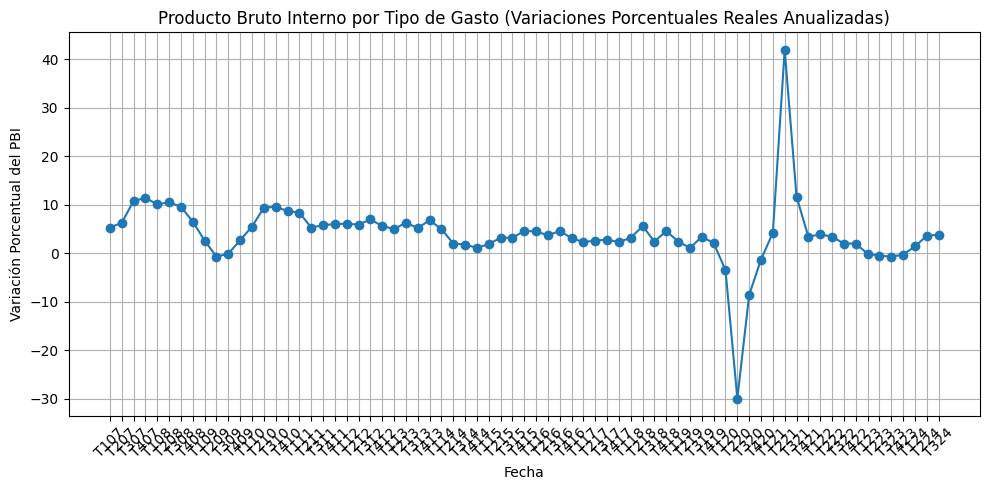

In [46]:
import matplotlib.pyplot as plt

# Creación del gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(BCRP_data['Fecha'], BCRP_data["Producto bruto interno por tipo de gasto (variaciones porcentuales reales anualizadas) - PBI"], marker='o')
plt.title('Producto Bruto Interno por Tipo de Gasto (Variaciones Porcentuales Reales Anualizadas)')
plt.xlabel('Fecha')
plt.ylabel('Variación Porcentual del PBI')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


## Web page structure

Web pages use HyperText Markup Language (HTML). HTML isn't a programming language like Python. It's a markup language with its own syntax and rules. When a web browser like Chrome or Firefox downloads a web page, it reads the HTML to determine how to render and display it.

Here's the HTML for a very simple web page:

```html
<html>
    <head>
        <title> A simple example page </title>
    </head>
    <body>
        <p> Here is some simple content for this page </p>
    </body>
</html>
```

HTML consists of tags. We open a tag like this:

```html
<p>
```

We close a tag like this:

```html
</p>
```

Anything in between the opening and closing of a tag is the content of that tag. We can nest tags to create complex formatting rules. Here's an example:

```html
<p><b>This is a bold text</b></p>
```

The `b` tag bolds the text inside it, and the `p` tag creates a new paragraph. The HTML above will display as a bold paragraph because the `b` tag is inside the `p` tag. In other words, the `b` tag is nested within the `p` tag.

HTML documents contain a few major sections. The `head` section contains information that's useful to the web browser that's rendering the page. (The user doesn't see it.) The `body` section contains the bulk of the content you will see in your browser.

Different tags have different purposes. For example, the `title` tag tells the browser what to display at the top of your tab. The `p` tag indicates that the content inside it is a single paragraph.

Let´s start with a very [simple](https://dataquestio.github.io/web-scraping-pages/simple.html) website

In [47]:
import requests

In [78]:
response = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
response.status_code

200

In [79]:
content =response.content
content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

In [53]:
# !pip install beautifulsoup4


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## BeautifulSoup

Downloading the page is the easy part. Let's say that we want to get the text in the first paragraph. Now we need to parse the page and extract the information we want

We'll use the `BeautifulSoup` library to parse the web page with Python. This library allows us to extract tags from an HTML document.

We can think of HTML documents as "trees," and the nested tags as "branches" (similar to a family tree). BeautifulSoup works the same way.

In our simple page, for example, the root of the "tree" is the `html` tag

```html
<html>
    <head>
        <title> A simple example page </title>
    </head>
    <body>
        <p> Here is some simple content for this page </p>
    </body>
</html>
```

The `html` tag contains two "branches," `head` and `body`. `head` contains one "branch", `title` and `body` contains one branch, `p`. Drilling down through these multiple branches is one way to parse a web page.

To extract the text inside the `p` tag, we need to get the `body` element, then the `p` element, and then finally the text inside the `p` element.

In [68]:
bcrp_web = requests.get("https://www.bcrp.gob.pe")
content_bcrp = bcrp_web.content
content_bcrp

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <title>Radware Captcha Page</title>\n    <meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="stylesheet" href="https://captcha.perfdrive.com/captcha-public/css/shieldsquare_styles.min.css">\n    <script type="text/javascript">\n\twindow.SSJSInternal = 21417;\n\n\tvar __uzdbm_1 = "6813d4ed-ace4-44ef-95c1-1bc02bbd436f";\n\tvar __uzdbm_2 = "OTBhYTk0MTgtYmp1bi00ZWIwLWE0ODktMjk2M2MxY2NhYTNhJDE4MS42Ny4xMzguMTAy";\n\t\n\t(function(w, d, e, u, c, g, a, b){\n\t\tw["SSJSConnectorObj"] = w["SSJSConnectorObj"] || {ss_cid : c, domain_info: g};\n\t\ta = d.createElement(e);\n\t\ta.async = true;\n\t\ta.src = u;\n\t\tb = d.getElementsByTagName(e)[0];\n\t\tb.parentNode.insertBefore(a, b);\n\t})(window,document,"script","https://cdn.perfdrive.com/aperture/aperture.js","b8c3","auto");\n</script>\n\n<script type="text/javascript">\nfunction _0x147a(){var _0x2ec979=[\'ecb5e100e5a9a3e7f6d1fd97512215282\',\'m

In [80]:
from bs4 import BeautifulSoup

# Initialize the parser, and pass in the content we grabbed earlier.
parser = BeautifulSoup(content, 'html.parser')
parser

# # # Get the body tag from the document.
# # # Since we passed in the top level of the document to the parser, we need to pick a branch off of the root.
# # # With BeautifulSoup, we can access branches by using tag types as attributes.
# body = parser.body
# # body

# # # Get the p tag from the body.
# p = body.p
# # p

# # # Print the text inside the p tag.
# # # Text is a property that gets the inside text of a tag.
# # print(p.text)

# # # Get the text from the html tag
# title_text = parser.head.title.text
# print(title_text)


<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

## Applying methods

Use the tag type as a property is not always the best way to parse a document. It's usually better to be more specific by using the `find_all` method. This method will find all occurrences of a tag in the current element, and return a list.

If we only want the first occurrence of an item, we'll need to index the list to get it. Aside from this difference, the process is the same as passing in the tag type as an attribute.

In [81]:
# Get a list of all occurrences of the body tag in the element.
body = parser.find_all("body")

# Get the paragraph tag.
p = body[0].find_all("p")

# Get the text.
print(p[0].text)

Here is some simple content for this page.


In [82]:
print(p)

[<p>Here is some simple content for this page.</p>]


## Element IDs

HTML allows elements to have IDs. Because they are unique, we can use an ID to refer to a specific element.

Here's an example page:

```html
<html>
    <head>
        <title> A simple example page </title>
    </head>
    <body>
        <div>
            <p id="first">
                First paragraph
            </p>
        </div>
        <p id="second">
            <b>
                Second paragraph
            </b>
        </p>
    </body>
</html>
```

HTML uses the `div` tag to create a divider that splits the page into logical units. We can think of a divider as a "box" that contains content. For example, different dividers hold a web page's footer, sidebar, and horizontal menu.

There are two paragraphs on this page. The first is nested inside a `div`. Luckily, the paragraphs have IDs. This means we can access them easily, even though they're nested.

In [83]:
# Get the page content and set up a new parser.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple_ids.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')


# Pass in the ID attribute to only get the element with that specific ID.
first_paragraph = parser.find_all("p", id="first")[0]
print(first_paragraph.text)


                First paragraph.
            


In [84]:
for elem in parser.find_all("p"):
    print(elem.text)


                First paragraph.
            


                Second paragraph.
            

